# Chest X-Ray Image Classification

Dataset: https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

## Learning Objectives

* Convolution Neural Networks
* Using Tensorflow on GPU
* Using various Keras models, pipelines and pre-processing
* Transfer Learning (How to import models, how to freeze weights)

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [2]:
# Check if Tensorflow is using GPU
tf.test.is_gpu_available(
    cuda_only=False,
    min_cuda_compute_capability=None
)

True

## Data Pre-Processing

In [44]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

validation_generator = test_datagen.flow_from_directory(
        'chest-xray-pneumonia/chest_xray/chest_xray/val/',
        target_size=(75, 75),
        batch_size=32,
        class_mode='binary')

train_generator = train_datagen.flow_from_directory(
        'chest-xray-pneumonia/chest_xray/chest_xray/train/',
        target_size=(75, 75),
        batch_size=32,
        class_mode='binary')

Found 16 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


Normal


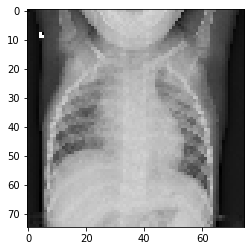

Pneuomnia


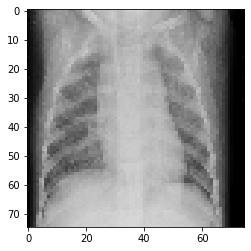

In [45]:
x,y = validation_generator.next()
for i in range(0,2):
    image = x[i]
    if y[i] == 0:
        print('Normal')
    else:
        print('Pneuomnia')
    plt.imshow(image)
    plt.show()

## Convolutional Neural Network

In [46]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), input_shape=(75,75,3), activation=tf.nn.relu, padding='same'),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu, padding='same'),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu, padding='same'),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu, padding='same'),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [47]:
model.fit_generator(
        train_generator,
        steps_per_epoch=160,
        epochs=10,
        workers=8,
        validation_data=validation_generator,
        validation_steps=1)

Epoch 1/10
160/160 [==============================] - 17s 106ms/step - loss: 0.4108 - acc: 0.8189 - val_loss: 0.9265 - val_acc: 0.6250
Epoch 2/10
160/160 [==============================] - 15s 92ms/step - loss: 0.2076 - acc: 0.9168 - val_loss: 0.5315 - val_acc: 0.6875
Epoch 3/10
160/160 [==============================] - 16s 103ms/step - loss: 0.1603 - acc: 0.9371 - val_loss: 0.4100 - val_acc: 0.6875
Epoch 4/10
160/160 [==============================] - 16s 97ms/step - loss: 0.1504 - acc: 0.9398 - val_loss: 0.4083 - val_acc: 0.7500
Epoch 5/10
160/160 [==============================] - 15s 96ms/step - loss: 0.1453 - acc: 0.9412 - val_loss: 0.1898 - val_acc: 1.0000
Epoch 6/10
160/160 [==============================] - 15s 95ms/step - loss: 0.1362 - acc: 0.9479 - val_loss: 0.2674 - val_acc: 0.8750
Epoch 7/10
160/160 [==============================] - 15s 96ms/step - loss: 0.1335 - acc: 0.9506 - val_loss: 0.5956 - val_acc: 0.6250
Epoch 8/10
160/160 [==============================] - 16s 99

In [48]:
test_generator = test_datagen.flow_from_directory(
        'chest-xray-pneumonia/chest_xray/chest_xray/test/',
        target_size=(75, 75),
        batch_size=32,
        class_mode='binary')

Found 624 images belonging to 2 classes.


In [79]:
y_true = test_generator.classes

In [80]:
y_true.shape

(624,)

In [81]:
y_pred = model.predict(test_generator)

In [82]:
y_pred.reshape((624,))

array([9.79990602e-01, 9.99815464e-01, 6.22264266e-01, 2.42335200e-02,
       2.92680264e-02, 3.35644662e-01, 9.99991298e-01, 9.98424292e-01,
       9.99522805e-01, 7.75557280e-01, 9.97240901e-01, 9.99614120e-01,
       9.57816362e-01, 9.99999464e-01, 2.04838216e-02, 1.35804743e-01,
       9.99983072e-01, 9.99804854e-01, 1.45459175e-02, 9.99999762e-01,
       8.80278647e-01, 9.99571800e-01, 1.55165792e-03, 9.94730353e-01,
       9.99135852e-01, 9.97736990e-01, 9.99825835e-01, 9.99802232e-01,
       2.45542705e-01, 1.51580572e-02, 1.14192784e-01, 9.99912620e-01,
       9.96096849e-01, 1.21270418e-02, 9.26065564e-01, 9.99954700e-01,
       9.99930978e-01, 9.99953449e-01, 4.01476920e-02, 4.37382460e-02,
       9.99997020e-01, 6.48028553e-01, 9.98596668e-01, 9.99690294e-01,
       7.76694417e-02, 2.39616930e-02, 9.99634802e-01, 9.99974132e-01,
       9.99554098e-01, 5.05778193e-03, 3.01072001e-03, 9.68755543e-01,
       2.87019193e-01, 9.99119401e-01, 8.24101567e-02, 4.73380089e-03,
      

In [83]:
y_pred = np.where(y_pred>0.5, 1, 0)

In [99]:
y_pred.mean()

0.6714743589743589

We achieve an accuracy of around 67% using simple conv net

In [84]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [85]:
conf_matrix = confusion_matrix(y_true, y_pred)

In [87]:
f1 = f1_score(y_true, y_pred)

In [88]:
f1

0.6600741656365884

## We will now use transfer learning based on Inceptionv3 network

Incepion v3 Requires at least 75x75 images

In [20]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

validation_generator = test_datagen.flow_from_directory(
        'chest-xray-pneumonia/chest_xray/chest_xray/val/',
        target_size=(75, 75),
        batch_size=32,
        class_mode='binary')

train_generator = train_datagen.flow_from_directory(
        'chest-xray-pneumonia/chest_xray/chest_xray/train/',
        target_size=(75, 75),
        batch_size=32,
        class_mode='binary')

Found 16 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


In [21]:
conv_base = tf.keras.applications.inception_v3.InceptionV3(include_top=False, weights='imagenet', input_tensor=None, input_shape=(75,75,3), pooling='max')

87916544/87910968 [==============================] - 33s 0us/step


In [37]:
# Freeze the convolution base
conv_base.trainable = False

In [38]:
transfer_model = tf.keras.models.Sequential([
  conv_base,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [39]:
transfer_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 2048)              21802784  
_________________________________________________________________
flatten_6 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_13 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 513       
Total params: 24,426,273
Trainable params: 2,623,489
Non-trainable params: 21,802,784
__________________________________

We see that most params are non-trainable as we have frozen them

In [40]:
transfer_model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [41]:
transfer_model.fit_generator(
        train_generator,
        steps_per_epoch=160,
        epochs=10,
        workers=8,
        validation_data=validation_generator,
        validation_steps=1)

Epoch 1/10
160/160 [==============================] - 18s 113ms/step - loss: 0.5444 - acc: 0.7359 - val_loss: 1.2604 - val_acc: 0.5000
Epoch 2/10
160/160 [==============================] - 16s 98ms/step - loss: 0.4575 - acc: 0.7855 - val_loss: 1.3204 - val_acc: 0.5000
Epoch 3/10
160/160 [==============================] - 16s 98ms/step - loss: 0.4036 - acc: 0.8146 - val_loss: 0.9000 - val_acc: 0.6250
Epoch 4/10
160/160 [==============================] - 16s 101ms/step - loss: 0.3667 - acc: 0.8354 - val_loss: 1.0910 - val_acc: 0.6875
Epoch 5/10
160/160 [==============================] - 16s 101ms/step - loss: 0.3612 - acc: 0.8391 - val_loss: 0.6741 - val_acc: 0.7500
Epoch 6/10
160/160 [==============================] - 16s 103ms/step - loss: 0.3612 - acc: 0.8475 - val_loss: 0.5725 - val_acc: 0.7500
Epoch 7/10
160/160 [==============================] - 16s 103ms/step - loss: 0.3555 - acc: 0.8439 - val_loss: 0.5039 - val_acc: 0.7500
Epoch 8/10
160/160 [==============================] - 17s

In [42]:
test_generator = test_datagen.flow_from_directory(
        'chest-xray-pneumonia/chest_xray/chest_xray/test/',
        target_size=(75, 75),
        batch_size=32,
        class_mode='binary')

Found 624 images belonging to 2 classes.


In [43]:
transfer_model.evaluate_generator(test_generator)

[1.0820902466773987, 0.67628205]

In [90]:
y_pred_transfer = transfer_model.predict(test_generator)

In [91]:
y_pred_transfer = np.where(y_pred_transfer>0.5, 1, 0)

In [101]:
y_pred_transfer.mean()

0.8942307692307693

We achieve a much higher accuracy of 89% using transfer learning

In [103]:
conf_matrix_transfer = confusion_matrix(y_true, y_pred_transfer,labels=[0,1])

In [104]:
conf_matrix_transfer

array([[ 25, 209],
       [ 41, 349]], dtype=int64)

In [105]:
f1_transfer = f1_score(y_true, y_pred_transfer)

In [106]:
f1_transfer

0.7362869198312236